In [27]:
from collections import defaultdict
from functools import partial
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from rich.pretty import pprint as pp
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

ppe = partial(pp, expand_all=True)


In [28]:
def tabulate_events(dpath: Path):
    final_out = {}
    for run_path in dpath.iterdir():
        dname = run_path.parts[-1]
        print(f"Converting run {dname}", end="")
        ea = EventAccumulator(str(run_path)).Reload()
        tags = ea.Tags()["scalars"]

        out = {}

        for tag in tags:
            tag_values = []
            wall_time = []
            steps = []

            for event in ea.Scalars(tag):
                tag_values.append(event.value)
                wall_time.append(event.wall_time)
                steps.append(event.step)

            out[tag] = pd.DataFrame(
                data=dict(zip(steps, np.array([tag_values, wall_time]).transpose(), strict=False)),
                columns=steps,
                index=["value", "wall_time"],
            )

        if len(tags) > 0:
            df = pd.concat(out.values(), keys=out.keys())
            print("- Done")
        else:
            print("- No scalars to write")

        final_out[dname] = df

    return final_out

In [29]:
RESULTS_DIR = Path("/mnt/c/Users/COCUTERSASHA/Desktop/results").resolve()
RESULTS_DIR

PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results')

In [30]:
runs_dir = list(RESULTS_DIR.glob("**/runs"))
runs_dir

[PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results/4 legs 0 SA 500k steps/runs'),
 PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results/4 legs 1 SA 500k steps/runs'),
 PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results/4 legs 2 SA 500k steps/runs'),
 PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results/4 legs 3 SA 500k steps/runs'),
 PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results/4 legs 4 SA 500k steps/runs')]

In [31]:
pat = str(next(runs_dir[0].iterdir()))
pat

'/mnt/c/Users/COCUTERSASHA/Desktop/results/4 legs 0 SA 500k steps/runs/Ant-v4__999__20240607-075604'

In [32]:
runs_df={}
for run in runs_dir:
    runs_df[run.parts[-2]] = tabulate_events(run)

Converting run Ant-v4__999__20240607-075604- Done
Converting run Ant-v4__999__20240615-165846- Done
Converting run Ant-v4__999__20240615-213143- Done
Converting run Ant-v4__999__20240616-154443- Done
Converting run Ant-v4__999__20240616-202715- Done


In [33]:
runs_df.keys()

dict_keys(['4 legs 0 SA 500k steps', '4 legs 1 SA 500k steps', '4 legs 2 SA 500k steps', '4 legs 3 SA 500k steps', '4 legs 4 SA 500k steps'])

In [34]:
runs_df['4 legs 0 SA 500k steps'].keys()

dict_keys(['Ant-v4__999__20240607-075604'])

In [35]:
runs_df["4 legs 0 SA 500k steps"]["Ant-v4__999__20240607-075604"].T

losses/actor_loss              
                   value     wall_time
5100           -1.976248  1.717736e+09
5200           -2.179612  1.717736e+09
5300           -2.457123  1.717736e+09
5400           -2.608272  1.717736e+09
5500           -2.917982  1.717736e+09
...                  ...           ...
499500       -439.378326  1.717747e+09
499600       -438.419495  1.717747e+09
499700       -429.413269  1.717747e+09
499800       -438.130829  1.717747e+09
499900       -443.549133  1.717747e+09

[4949 rows x 2 columns]

In [36]:
ea = EventAccumulator(pat).Reload()
ea.Tags()["scalars"]

['losses/actor_loss']

In [37]:
ea.Scalars("losses/actor_loss")

[ScalarEvent(wall_time=1717736173.7093272, step=5100, value=-1.9762483835220337),
 ScalarEvent(wall_time=1717736175.5656726, step=5200, value=-2.1796116828918457),
 ScalarEvent(wall_time=1717736177.3642404, step=5300, value=-2.457122802734375),
 ScalarEvent(wall_time=1717736179.2135842, step=5400, value=-2.608271598815918),
 ScalarEvent(wall_time=1717736181.026647, step=5500, value=-2.9179821014404297),
 ScalarEvent(wall_time=1717736182.8840475, step=5600, value=-3.084176778793335),
 ScalarEvent(wall_time=1717736184.7241237, step=5700, value=-3.240662097930908),
 ScalarEvent(wall_time=1717736186.5704024, step=5800, value=-3.542268991470337),
 ScalarEvent(wall_time=1717736188.3937373, step=5900, value=-4.111066818237305),
 ScalarEvent(wall_time=1717736190.220275, step=6000, value=-3.852234363555908),
 ScalarEvent(wall_time=1717736192.042398, step=6100, value=-4.454812526702881),
 ScalarEvent(wall_time=1717736193.8744538, step=6200, value=-5.13303279876709),
 ScalarEvent(wall_time=171773

In [51]:
results_path = Path("/mnt/c/Users/COCUTERSASHA/Desktop/results").resolve()
results_path

PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results')

In [52]:
results_path.exists()

True

In [53]:
csvs = list(results_path.glob("**/*.csv"))
csvs

[PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results/4 legs 0 SA 500k steps/Ant-v4__999__20240607-075604_charts_episodic_return_env-0.csv'),
 PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results/4 legs 0 SA 500k steps/Ant-v4__999__20240607-075604_charts_episodic_return_env-1.csv'),
 PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results/4 legs 0 SA 500k steps/Ant-v4__999__20240607-075604_charts_episodic_return_env-2.csv'),
 PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results/4 legs 0 SA 500k steps/Ant-v4__999__20240607-075604_charts_episodic_return_env-3.csv'),
 PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results/4 legs 1 SA 500k steps/Ant-v4__999__20240615-165846_charts_episodic_return_env-0.csv'),
 PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results/4 legs 1 SA 500k steps/Ant-v4__999__20240615-165846_charts_episodic_return_env-1.csv'),
 PosixPath('/mnt/c/Users/COCUTERSASHA/Desktop/results/4 legs 1 SA 500k steps/Ant-v4__999__20240615-165846_charts_episodic_return_env-2.csv'),
 Posix

In [54]:
dfs = defaultdict(dict)
for csv_path in csvs:
    # key = ".".join(csv_path.parts[-2:]).replace(" ", "_")
    setup, run_name = csv_path.parts[-2:]
    dfs[setup.replace(" ", "_")][run_name] = pd.read_csv(csv_path)
    # dfs[key] = pd.read_csv(csv_path)

In [55]:
ppe([*dfs["4_legs_0_SA_500k_steps"].keys()])

[
│   'Ant-v4__999__20240607-075604_charts_episodic_return_env-0.csv',
│   'Ant-v4__999__20240607-075604_charts_episodic_return_env-1.csv',
│   'Ant-v4__999__20240607-075604_charts_episodic_return_env-2.csv',
│   'Ant-v4__999__20240607-075604_charts_episodic_return_env-3.csv'
]

In [56]:
dfs["4_legs_0_SA_500k_steps"]["Ant-v4__999__20240607-075604_charts_episodic_return_env-1.csv"]

,Wall time,Step,Value
0,1.717736e+09,13,-11.716684
1,1.717736e+09,31,-13.627132
2,1.717736e+09,1031,-383.094360
3,1.717736e+09,1062,-4.662867
4,1.717736e+09,1151,-59.544853
...,...,...,...
636,1.717746e+09,497167,4437.287109
637,1.717746e+09,498167,5594.033691
638,1.717746e+09,498385,960.343689
639,1.717746e+09,498847,2430.994141


In [57]:
SA0 = dfs["4_legs_0_SA_500k_steps"]["Ant-v4__999__20240607-075604_charts_episodic_return_env-0.csv"].merge(dfs["4_legs_0_SA_500k_steps"]["Ant-v4__999__20240607-075604_charts_episodic_return_env-1.csv"], how='outer')
SA0 = SA0.merge(dfs["4_legs_0_SA_500k_steps"]["Ant-v4__999__20240607-075604_charts_episodic_return_env-2.csv"], how='outer')
SA0 = SA0.merge(dfs["4_legs_0_SA_500k_steps"]["Ant-v4__999__20240607-075604_charts_episodic_return_env-3.csv"], how='outer')

In [58]:
SA0

,Wall time,Step,Value
0,1.717736e+09,13,-11.716684
1,1.717736e+09,31,-13.627132
2,1.717736e+09,61,-13.186014
3,1.717736e+09,94,-15.728502
4,1.717736e+09,116,-18.909285
...,...,...,...
2604,1.717746e+09,498991,3985.627930
2605,1.717746e+09,499094,3116.438232
2606,1.717747e+09,499730,5642.908691
2607,1.717747e+09,499847,5710.327637


In [59]:
ppe([*dfs["4_legs_1_SA_500k_steps"].keys()])

[
│   'Ant-v4__999__20240615-165846_charts_episodic_return_env-0.csv',
│   'Ant-v4__999__20240615-165846_charts_episodic_return_env-1.csv',
│   'Ant-v4__999__20240615-165846_charts_episodic_return_env-2.csv',
│   'Ant-v4__999__20240615-165846_charts_episodic_return_env-3.csv'
]

In [60]:
SA1 = dfs["4_legs_1_SA_500k_steps"]["Ant-v4__999__20240615-165846_charts_episodic_return_env-0.csv"].merge(dfs["4_legs_1_SA_500k_steps"]["Ant-v4__999__20240615-165846_charts_episodic_return_env-1.csv"], how='outer')
SA1 = SA1.merge(dfs["4_legs_1_SA_500k_steps"]["Ant-v4__999__20240615-165846_charts_episodic_return_env-2.csv"], how='outer')
SA1 = SA1.merge(dfs["4_legs_1_SA_500k_steps"]["Ant-v4__999__20240615-165846_charts_episodic_return_env-3.csv"], how='outer')

In [61]:
SA1

,Wall time,Step,Value
0,1.718460e+09,13,-11.716684
1,1.718460e+09,31,-13.627132
2,1.718460e+09,61,-13.186014
3,1.718460e+09,94,-15.728502
4,1.718460e+09,116,-18.909285
...,...,...,...
2577,1.718472e+09,499001,5503.003418
2578,1.718472e+09,499500,5616.894043
2579,1.718472e+09,499621,5284.961914
2580,1.718472e+09,499735,4010.703857


In [62]:
ppe([*dfs["4_legs_2_SA_500k_steps"].keys()])

[
│   'Ant-v4__999__20240615-213143_charts_episodic_return_env-0.csv',
│   'Ant-v4__999__20240615-213143_charts_episodic_return_env-1.csv',
│   'Ant-v4__999__20240615-213143_charts_episodic_return_env-2.csv',
│   'Ant-v4__999__20240615-213143_charts_episodic_return_env-3.csv'
]

In [63]:
SA2 = dfs["4_legs_2_SA_500k_steps"]["Ant-v4__999__20240615-213143_charts_episodic_return_env-0.csv"].merge(dfs["4_legs_2_SA_500k_steps"]["Ant-v4__999__20240615-213143_charts_episodic_return_env-1.csv"], how='outer')
SA2 = SA2.merge(dfs["4_legs_2_SA_500k_steps"]["Ant-v4__999__20240615-213143_charts_episodic_return_env-2.csv"], how='outer')
SA2 = SA2.merge(dfs["4_legs_2_SA_500k_steps"]["Ant-v4__999__20240615-213143_charts_episodic_return_env-3.csv"], how='outer')

In [64]:
SA2

,Wall time,Step,Value
0,1.718476e+09,13,-11.716684
1,1.718476e+09,31,-13.627132
2,1.718476e+09,61,-13.186014
3,1.718476e+09,94,-15.728502
4,1.718476e+09,116,-18.909285
...,...,...,...
2582,1.718490e+09,498966,5494.166504
2583,1.718490e+09,499305,5704.937988
2584,1.718490e+09,499466,5606.716309
2585,1.718490e+09,499480,5629.235840


In [65]:
ppe([*dfs["4_legs_3_SA_500k_steps"].keys()])

[
│   'Ant-v4__999__20240616-154443_charts_episodic_return_env-0.csv',
│   'Ant-v4__999__20240616-154443_charts_episodic_return_env-1.csv',
│   'Ant-v4__999__20240616-154443_charts_episodic_return_env-2.csv',
│   'Ant-v4__999__20240616-154443_charts_episodic_return_env-3.csv'
]

In [66]:
SA3 = dfs["4_legs_3_SA_500k_steps"]["Ant-v4__999__20240616-154443_charts_episodic_return_env-0.csv"].merge(dfs["4_legs_3_SA_500k_steps"]["Ant-v4__999__20240616-154443_charts_episodic_return_env-1.csv"], how='outer')
SA3 = SA3.merge(dfs["4_legs_3_SA_500k_steps"]["Ant-v4__999__20240616-154443_charts_episodic_return_env-2.csv"], how='outer')
SA3 = SA3.merge(dfs["4_legs_3_SA_500k_steps"]["Ant-v4__999__20240616-154443_charts_episodic_return_env-3.csv"], how='outer')

In [67]:
SA3

,Wall time,Step,Value
0,1.718542e+09,13,-11.716684
1,1.718542e+09,31,-13.627132
2,1.718542e+09,61,-13.186014
3,1.718542e+09,94,-15.728502
4,1.718542e+09,116,-18.909285
...,...,...,...
2453,1.718557e+09,498797,5586.817383
2454,1.718557e+09,499004,5572.963379
2455,1.718557e+09,499377,5623.018066
2456,1.718557e+09,499751,5784.163086


In [68]:
ppe([*dfs["4_legs_4_SA_500k_steps"].keys()])

[
│   'Ant-v4__999__20240616-202715_charts_episodic_return_env-0.csv',
│   'Ant-v4__999__20240616-202715_charts_episodic_return_env-1.csv',
│   'Ant-v4__999__20240616-202715_charts_episodic_return_env-2.csv',
│   'Ant-v4__999__20240616-202715_charts_episodic_return_env-3.csv'
]

In [69]:
SA4 = dfs["4_legs_4_SA_500k_steps"]["Ant-v4__999__20240616-202715_charts_episodic_return_env-0.csv"].merge(dfs["4_legs_4_SA_500k_steps"]["Ant-v4__999__20240616-202715_charts_episodic_return_env-1.csv"], how='outer')
SA4 = SA4.merge(dfs["4_legs_4_SA_500k_steps"]["Ant-v4__999__20240616-202715_charts_episodic_return_env-2.csv"], how='outer')
SA4 = SA4.merge(dfs["4_legs_4_SA_500k_steps"]["Ant-v4__999__20240616-202715_charts_episodic_return_env-3.csv"], how='outer')

In [70]:
SA4

,Wall time,Step,Value
0,1.718559e+09,13,-11.716684
1,1.718559e+09,31,-13.627132
2,1.718559e+09,61,-13.186014
3,1.718559e+09,94,-15.728502
4,1.718559e+09,116,-18.909285
...,...,...,...
2464,1.718574e+09,498596,5382.773438
2465,1.718574e+09,499168,5791.053223
2466,1.718574e+09,499351,5324.112793
2467,1.718574e+09,499380,5642.348633


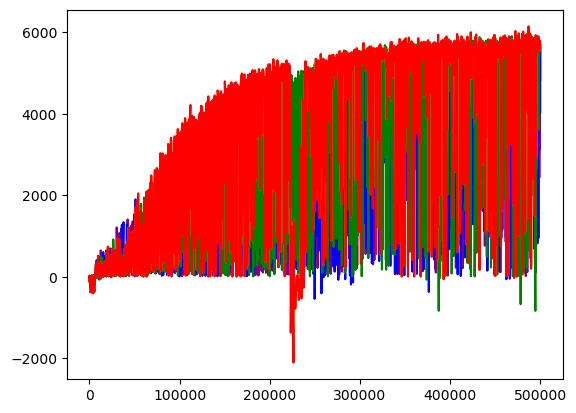

In [71]:
plt.plot(SA0['Step'], SA0['Value'], color='purple')
plt.plot(SA1['Step'], SA1['Value'], color='blue')
plt.plot(SA2['Step'], SA2['Value'], color='green')
plt.plot(SA3['Step'], SA3['Value'], color='orange')
plt.plot(SA3['Step'], SA3['Value'], color='r')
plt.show()

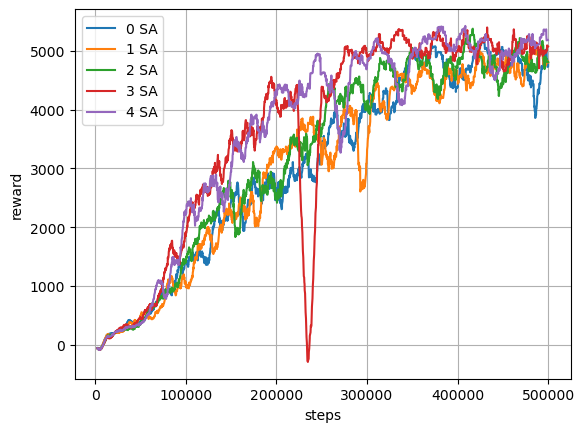

In [74]:
fig, axs = plt.subplots()
axs: Axes
for idx, report in enumerate((SA0, SA1, SA2, SA3, SA4)):
    axs.plot(report["Step"], report["Value"].rolling(window=50).mean(), label=f"{idx} SA")
axs.legend()
axs.set_xlabel("steps")
axs.set_ylabel("reward")
axs.grid()
plt.show()